In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set()

In [2]:
with open('hkg_network_post.txt', mode='r') as BabyFlightNodes:
    FlightEdges = BabyFlightNodes.read().split("%SECTION%")[2]
with open('hkg_network_post.txt', mode='r') as BabyFlightNodes:
    FlightNodes = BabyFlightNodes.read().split("%SECTION%")[1]

In [3]:
with open('Flight2_HKG.txt', mode='r') as BabyFlight:
    Flight1 = BabyFlight.read().split("\n")[1]

In [4]:
from ipynb.fs.full.GetTrajectory import GetTrajectory

In [5]:
from ipynb.fs.full.GetTaxiway import GetTaxiway, GetEdgeID, GetEdgeStart, GetEdgeEnd, GetEdgeSpecification, GetEdgeLength, GetEdgesAndNodes

In [6]:
FlightNodesList = GetTaxiway(FlightNodes, FlightEdges)[0]
FlightEdgesList = GetTaxiway(FlightNodes, FlightEdges)[1]
FlightEdgesWeights = GetTaxiway(FlightNodes, FlightEdges)[2]

In [7]:
FlightCoordsList = GetTrajectory(Flight1)

In [8]:
Node = []
for index, item in enumerate(FlightCoordsList):
    Node.append((float(item[0]),float(item[1])))

In [9]:
#import xlwt
#from tempfile import TemporaryFile
#book = xlwt.Workbook()
#sheet1 = book.add_sheet('sheet1')
#
#for i,e in enumerate(FlightCoordsList):
#    sheet1.write(i,1,e[0])
#    sheet1.write(i,2,e[1])
#for i,e in enumerate(FlightEdgesList):
#    sheet1.write(i,4,e[0])
#    sheet1.write(i,5,e[1])
#    sheet1.write(i,4,e[0])
#    sheet1.write(i,5,e[1])
#    sheet1.write(i,4,e[0])
#    sheet1.write(i,5,e[1])
#    sheet1.write(i,4,e[0])
#    sheet1.write(i,5,e[1])
#    sheet1.write(i,5,e[1])
#name = "random.xls"
#book.save(name)
#book.save(TemporaryFile())

In [10]:
EdgesAndNodes = GetEdgesAndNodes(FlightEdgesList, FlightNodesList)

In [11]:
Nodict = {}
for index, item in enumerate(Node):
    NodeX = item[0]
    NodeY = item[1]
    Nodict[int(index+1)] = (NodeX, NodeY)
Nodict

{1: (30.216034, 120.40428),
 2: (30.214233, 120.399765),
 3: (30.212448, 120.39621),
 4: (30.210773, 120.39186),
 5: (30.209284, 120.388565),
 6: (30.20784, 120.38549),
 7: (30.206305, 120.38181),
 8: (30.204758, 120.37843),
 9: (30.202906, 120.375),
 10: (30.201416, 120.37105),
 11: (30.199905, 120.36783),
 12: (30.198349, 120.36411),
 13: (30.196714, 120.360886),
 14: (30.194504, 120.355225),
 15: (30.192947, 120.35188),
 16: (30.191483, 120.34871),
 17: (30.189684, 120.344955),
 18: (30.188187, 120.3416),
 19: (30.186493, 120.33799),
 20: (30.185165, 120.334595),
 21: (30.183401, 120.33034),
 22: (30.181818, 120.326935),
 23: (30.18013, 120.32313),
 24: (30.178345, 120.318924),
 25: (30.176193, 120.31462),
 26: (30.174229, 120.310234),
 27: (30.172531, 120.30605),
 28: (30.170366, 120.30139),
 29: (30.168549, 120.29733),
 30: (30.166534, 120.29265),
 31: (30.164474, 120.28823),
 32: (30.162453, 120.28371),
 33: (30.160172, 120.27854),
 34: (30.158066, 120.27374),
 35: (30.155888, 12

In [39]:
G = nx.Graph()

Nodict = {}
for index, item in enumerate(Node):
    NodeX = item[0]
    NodeY = item[1]
    Nodict[int(index+1)] = (NodeX, NodeY)
    
Nodes = {}

for item in FlightNodesList:
    NodeX = float(item[1])
    NodeY = float(item[2])
    Nodes[int(item[0])] = (NodeX, NodeY)

G.add_nodes_from(Nodes.keys())
for n, p in iter(Nodes.items()):
    G.node[n]['pos'] = p

NodeLinks = []
for item in EdgesAndNodes:
    NodeLinks.append((item[1], item[2], {'weight':item[3]}))
G.add_edges_from(NodeLinks)

#specification = nx.get_edge_attributes(G, 'specification')
weight = nx.get_edge_attributes(G, 'weight')
pos = nx.get_node_attributes(G, 'pos')

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


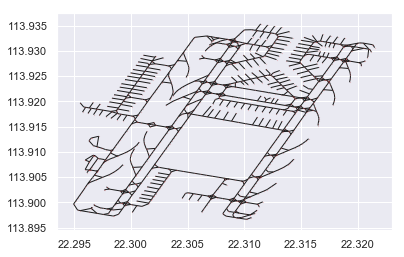

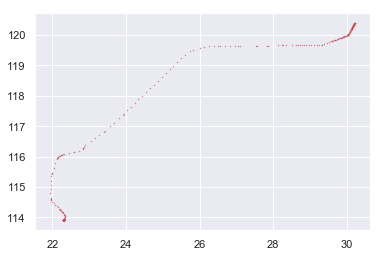

In [13]:
plt.figure(1)

dic = {'taxiway':'red', 'gate': 'blue'}

nx.draw_networkx(G, pos, node_size = 0.01, with_labels = False)
plt.figure(2)
nx.draw_networkx(H, pos2, node_size = 0.1, with_labels = False)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)


In [14]:
nx.draw_networkx?

In [15]:
GateEdges = []
for item in EdgesAndNodes:
    if item[4] == 'gate':
        GateEdges.append(item)
GateEdges[0]

(2490,
 2198,
 2199,
 129.33780595365022,
 'gate',
 22.3159992,
 113.9252673,
 22.3149608,
 113.9246989)

In [16]:
Node = []
Nodes = []
GateNodes = []
for item in FlightNodesList:
    Nodes.append((float(item[1]),float(item[2])))
for item in FlightCoordsList:
    Node.append((float(item[0]),float(item[1])))
for item in GateEdges:
    GateNodes.append((item[5], item[6]))
    GateNodes.append((item[7], item[8]))
GateNodes[1]

(22.3149608, 113.9246989)

In [17]:
Node[4], Nodes[4], Nodes[8], Nodes[3]

((30.209284, 120.388565),
 (22.2959659, 113.9029503),
 (22.2967974, 113.9053643),
 (22.295528, 113.8983679))

In [18]:
from scipy import spatial
tree = spatial.KDTree(Nodes)
HighlightedNodeIDs = list(tree.query(Node[200], 10)[1])
print(HighlightedNodeIDs)

[966, 484, 483, 275, 964, 344, 280, 710, 714, 2]


In [19]:
HighlightedNodes=[]
for item in HighlightedNodeIDs:
    HighlightedNodes.append(Nodes[item])
HighlightedNodes    

[(22.31144, 113.9353378),
 (22.3056468, 113.9326848),
 (22.3055606, 113.9325412),
 (22.3066833, 113.9329488),
 (22.3120579, 113.9351152),
 (22.3099947, 113.9341481),
 (22.3070578, 113.9328091),
 (22.3099092, 113.9339807),
 (22.3053424, 113.931895),
 (22.310662, 113.9341883)]

In [20]:
HighlightEdge = []
for item in EdgesAndNodes:
    for i in HighlightedNodes:
        if item[5] == i[0] and item[6] == i[1]:
            HighlightEdge.append(item)
        elif item[7] == i[0] and item[8] == i[1]:
            HighlightEdge.append(item)
    else:
        pass
HighlightedEdges1 = list(set(HighlightEdge))
HighlightedEdges2 = set(HighlightEdge)

In [31]:
EdgesAndNodes[100]

(236,
 1595,
 1594,
 12.241710236809912,
 'taxiway',
 22.3013027,
 113.9202653,
 22.3012161,
 113.9203389)

In [36]:
NodePath = nx.dijkstra_path(G,50,2638)
NodePath

[50, 2638]

In [43]:
def GetEdgesBetween(NodePath, EdgesAndNodes):
    EdgesBetween = []
    for index, EdgeNode in enumerate(NodePath):
        for edge in EdgesAndNodes:
            try:
                if EdgeNode in [edge[1], edge[2]] and NodePath[index+1] in [edge[1],edge[2]]:
                    EdgesBetween.append(edge)
            except IndexError:
                pass
    return EdgesBetween



In [50]:
EdgeSample = []
EdgeSample.append(GetEdgesBetween(nx.dijkstra_path(G,50,60), EdgesAndNodes))